In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler 

In [2]:
#loading data
df = pd.read_csv('D:\study\elevatelabs_aiml_intership\datasets\Housing.csv')
print (df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\chauh\AppData\Local\Temp\ipykernel_13584\613578024.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('D:\study\elevatelabs_aiml_intership\datasets\Housing.csv')


In [ ]:
#checking for null values
print(df.isnull().sum())  

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
# converting yes/no to binary for valuation
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [ ]:
#converting to one-hot
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [ ]:
# checking for null values
print(df.isnull().sum())  


price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


In [ ]:
# spliting data in train and test
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# fitting the linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
# evaluating mae , mse , r^2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 970043.40
MSE: 1754318687330.66
R²: 0.65


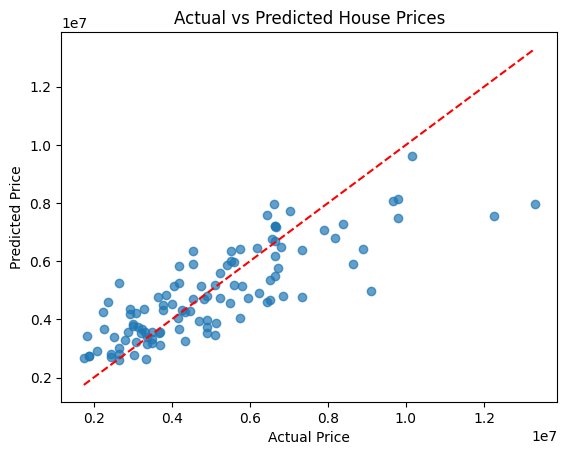

In [ ]:
# plotting of regression line
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [16]:
# Combine feature names and coefficients for interpretation
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coef_df)
print("Intercept:", model.intercept_)


                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
6                          basement  3.902512e+05
7                   hotwaterheating  6.846499e+05
8                   airconditioning  7.914267e+05
9                           parking  2.248419e+05
10                         prefarea  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
Intercept: 260032.35760741588
